In [5]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

# Decision Tree Regressor

In [2]:
df = pd.read_csv("Concrete_Data.csv")

In [3]:
df

Cement  Blast    Fly  Water  Superplasticizer  Coarse   Fine  Age  \
0      540.0    0.0    0.0  162.0               2.5  1040.0  676.0   28   
1      540.0    0.0    0.0  162.0               2.5  1055.0  676.0   28   
2      332.5  142.5    0.0  228.0               0.0   932.0  594.0  270   
3      332.5  142.5    0.0  228.0               0.0   932.0  594.0  365   
4      198.6  132.4    0.0  192.0               0.0   978.4  825.5  360   
...      ...    ...    ...    ...               ...     ...    ...  ...   
1025   276.4  116.0   90.3  179.6               8.9   870.1  768.3   28   
1026   322.2    0.0  115.6  196.0              10.4   817.9  813.4   28   
1027   148.5  139.4  108.6  192.7               6.1   892.4  780.0   28   
1028   159.1  186.7    0.0  175.6              11.3   989.6  788.9   28   
1029   260.9  100.5   78.3  200.6               8.6   864.5  761.5   28   

      Strength  
0        79.99  
1        61.89  
2        40.27  
3        41.05  
4        44.30  
...        ...  
1025     44.28  
1026     31.18  
1027     23.70  
1028     32.77  
1029     32.40  

[1030 rows x 9 columns]

In [4]:
x, y = df.drop("Strength", axis = "columns"), df.Strength

In [8]:
# ______________________________________________________________________________________
# Pipeline

# one hot encoder
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False,
    drop='first'
).set_output(transform='pandas')

trans_ohe = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)),
    verbose_feature_names_out=False
).set_output(transform='pandas')


# scaler
scl_std = StandardScaler().set_output(transform = "pandas")
scl_mm = MinMaxScaler().set_output(transform = "pandas")


# model
dtc = DecisionTreeRegressor(
    random_state = 24,
    # max_depth = 4
)


pipe_pca = Pipeline([("OHE", trans_ohe), ("SCL", scl_std), ("DTC", dtc)])


# _____________________________________________________________________________________
# GCV

params = {
    "DTC__max_depth" : [None, 4, 6],
    "DTC__min_samples_leaf" : [1, 10, 25, 50],
    "DTC__min_samples_split" : [2, 10, 25, 50],
}

kfolds = StratifiedKFold(n_splits = 5,
                        random_state = 24,
                        shuffle = True)

kfold = KFold(n_splits = 5,
              random_state = 24,
              shuffle = True)

gcv = GridSearchCV(pipe_pca,
                  param_grid = params,
                  scoring = "r2",
                  cv = kfold,
                  verbose = 3)

gcv.fit(x, y)
# gcv.fit(x, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.893 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.798 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.883 total time=   0.0s
[CV 4/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.792 total time=   0.0s
[CV 5/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.876 total time=   0.0s
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.872 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.786 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.883 total time=   0.0s

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a83d1264d60>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a83d1267670>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', StandardScaler()),
                                       ('DTC',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DTC__max_depth': [None, 4, 6],
                         'DTC__min_samples_leaf': [1, 10, 25, 50],
                         'DTC__min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [10]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8483958118283799
{'DTC__max_depth': None, 'DTC__min_samples_leaf': 1, 'DTC__min_samples_split': 2}


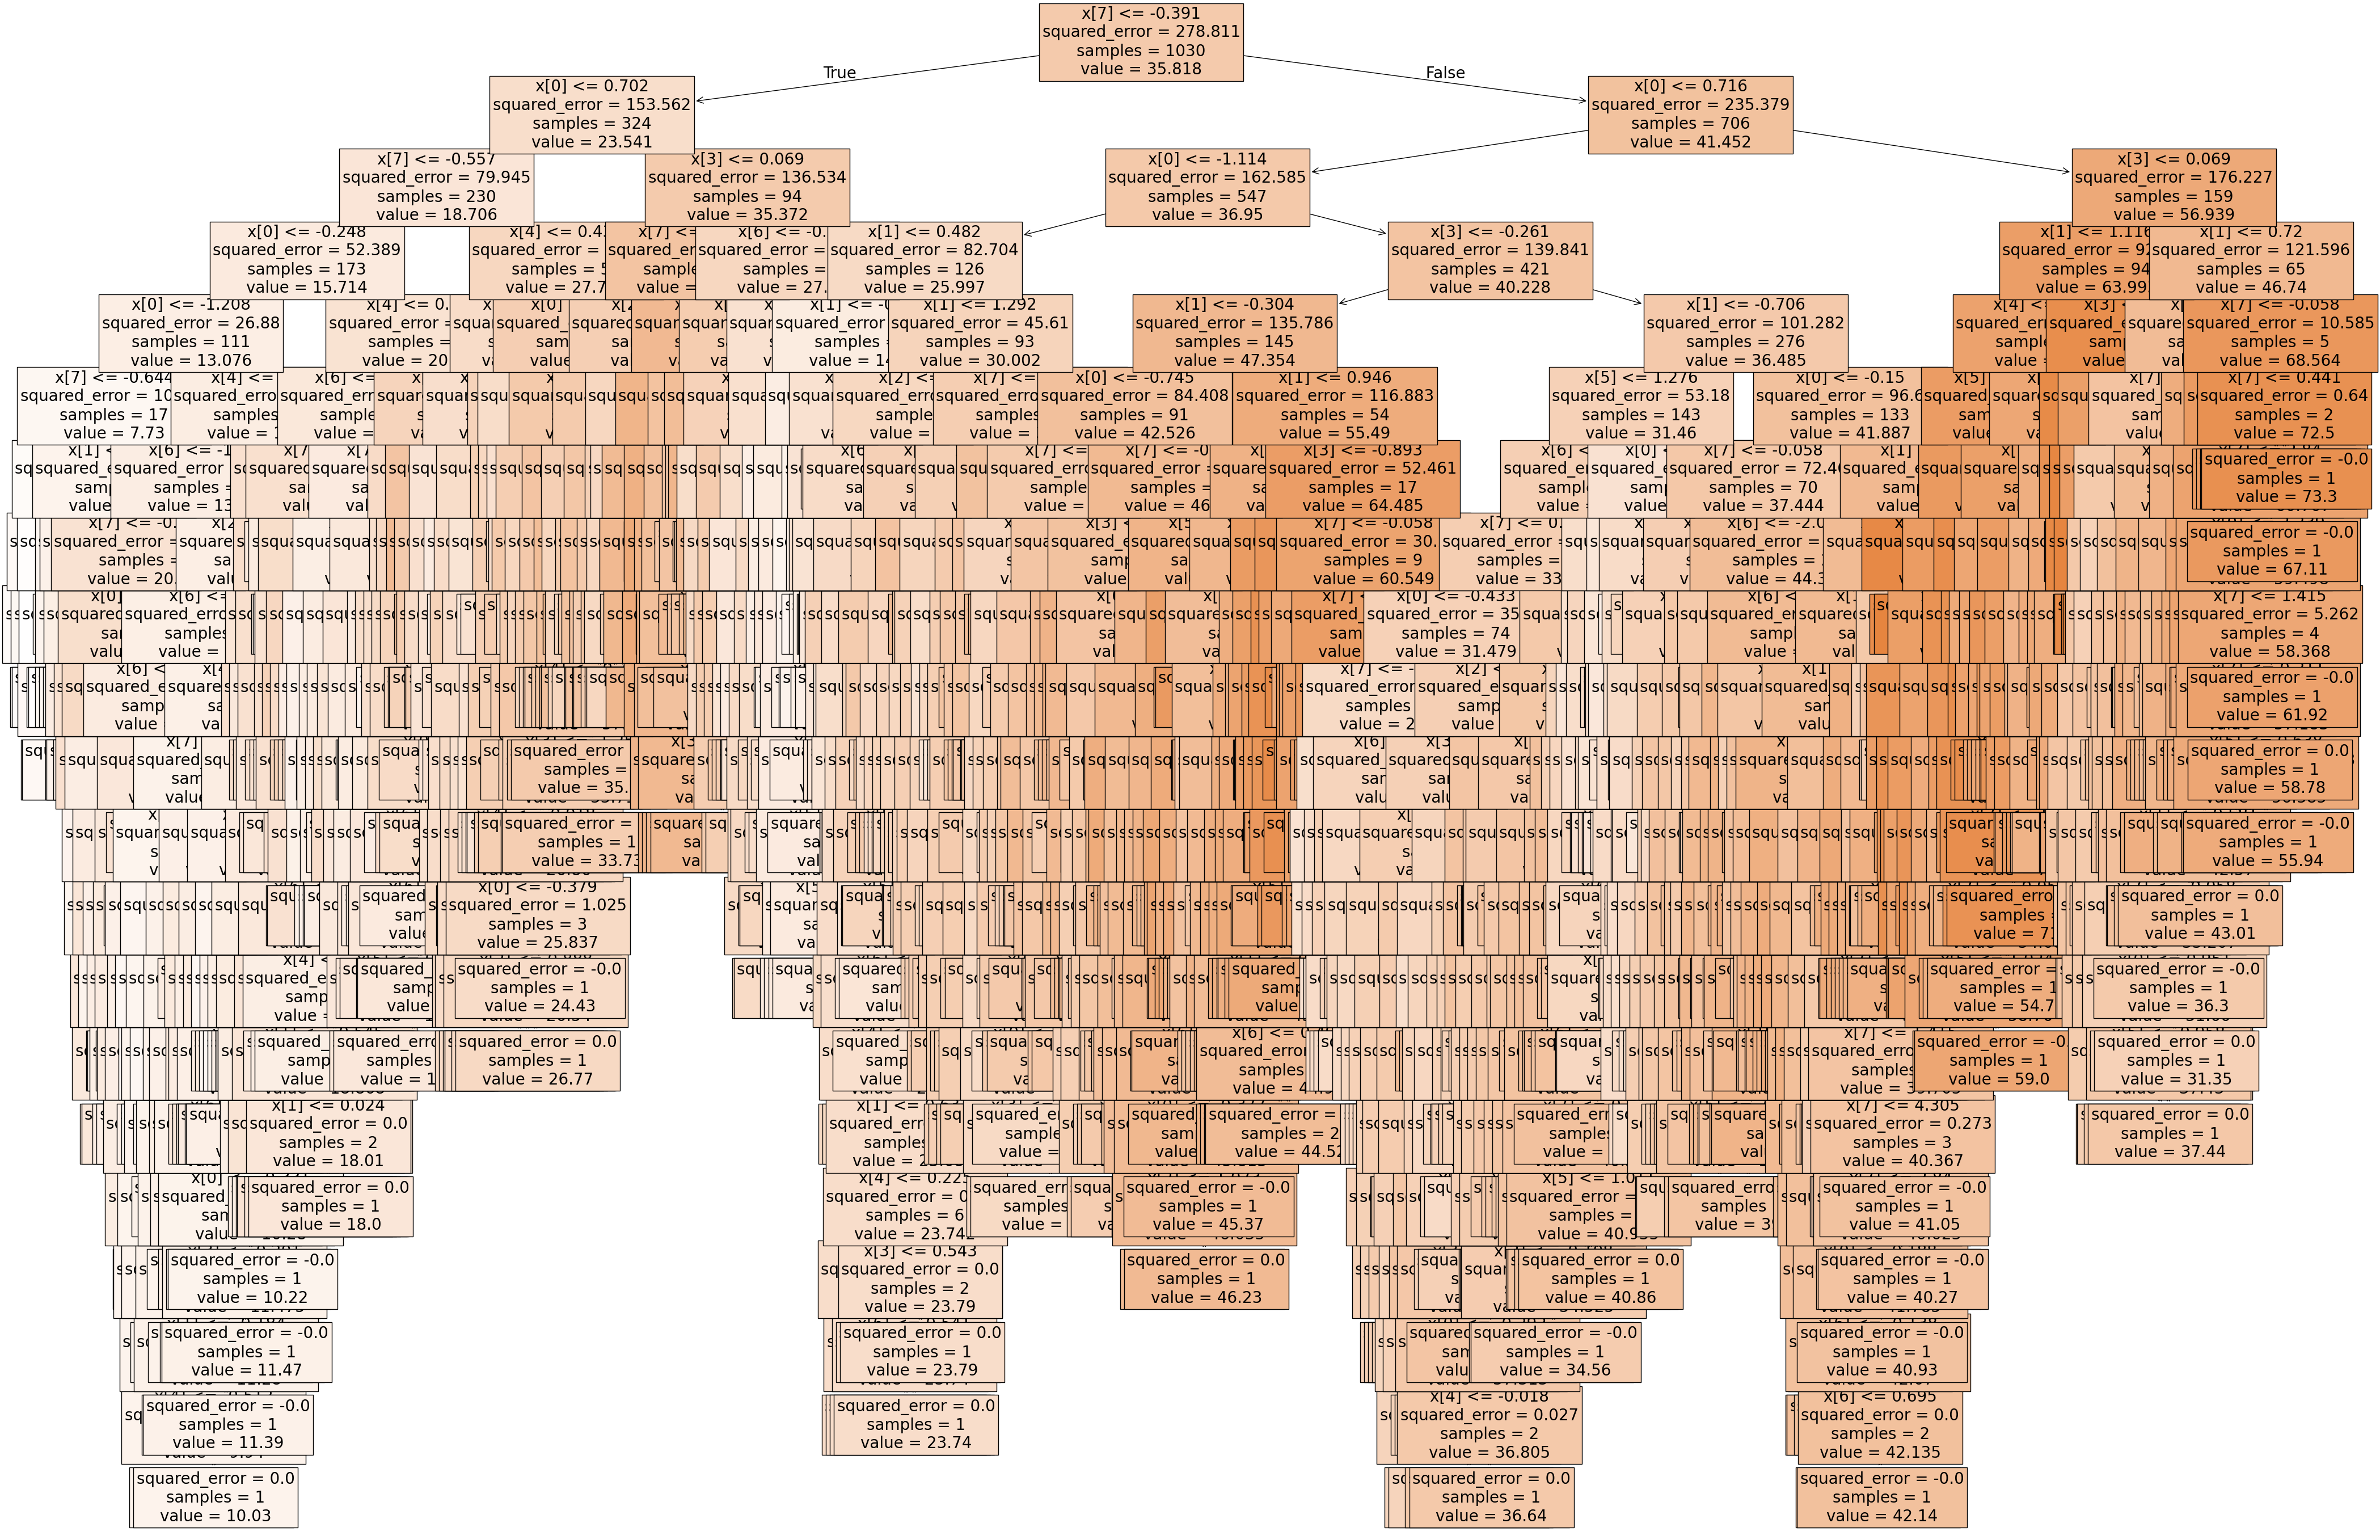

In [11]:
best_tree = gcv.best_estimator_.named_steps['DTC']

plt.figure(figsize = (50, 35))
plot_tree(best_tree,
          # feature_names = list(X.columns),
          filled = True,
          fontsize = 20,
         )

plt.show()

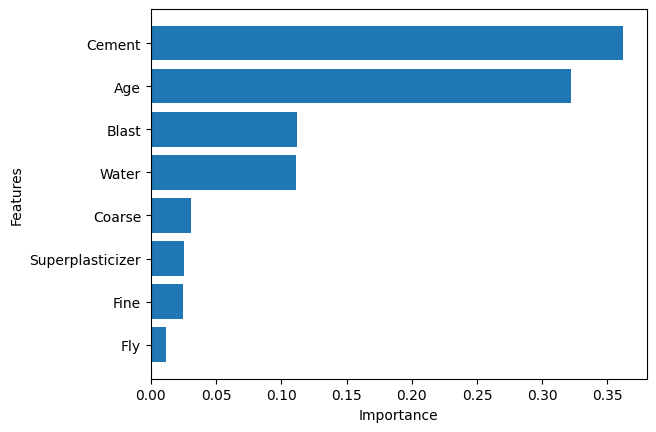

In [15]:
df_imp  = pd.DataFrame({"feature" : gcv.best_estimator_.named_steps['OHE'].get_feature_names_out(),
                        "importance" : best_tree.feature_importances_})       # Note here OHE refers to Column transformer not encoder
df_imp.sort_values("importance", inplace = True, )
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# print(df_imp)

# Medical Dataset

In [17]:
df = pd.read_csv("insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [19]:
y = df.charges
x = df.drop("charges", axis = "columns")

In [26]:
# ______________________________________________________________________________________
# Pipeline

# one hot encoder
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False,
    drop='first'
).set_output(transform='pandas')

trans_ohe = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)),
    verbose_feature_names_out=False
).set_output(transform='pandas')


# scaler
scl_std = StandardScaler().set_output(transform = "pandas")
scl_mm = MinMaxScaler().set_output(transform = "pandas")


# model
dtc = DecisionTreeRegressor(
    random_state = 24,
    # max_depth = 4
)


pipe_pca = Pipeline([("OHE", trans_ohe), ("SCL", scl_std), ("DTC", dtc)])


# _____________________________________________________________________________________
# GCV

params = {
    "DTC__max_depth" : [None, 4, 6],
    "DTC__min_samples_leaf" : [1, 5, 10, 25, 50],
    "DTC__min_samples_split" : [2, 10, 25, 50],
}

kfolds = StratifiedKFold(n_splits = 5,
                        random_state = 24,
                        shuffle = True)

kfold = KFold(n_splits = 5,
              random_state = 24,
              shuffle = True)

gcv = GridSearchCV(pipe_pca,
                  param_grid = params,
                  scoring = "r2",
                  cv = kfold,
                  verbose = 3)

gcv.fit(x, y)
# gcv.fit(x, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.765 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.663 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.711 total time=   0.0s
[CV 4/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.761 total time=   0.0s
[CV 5/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.747 total time=   0.0s
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.831 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.771 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.761 total time=   0.0s

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a83cf0d4070>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a83cf0d5fc0>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', StandardScaler()),
                                       ('DTC',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DTC__max_depth': [None, 4, 6],
                         'DTC__min_samples_leaf': [1, 5, 10, 25, 50],
                         'DTC__min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [27]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8506984515845432
{'DTC__max_depth': 6, 'DTC__min_samples_leaf': 50, 'DTC__min_samples_split': 2}


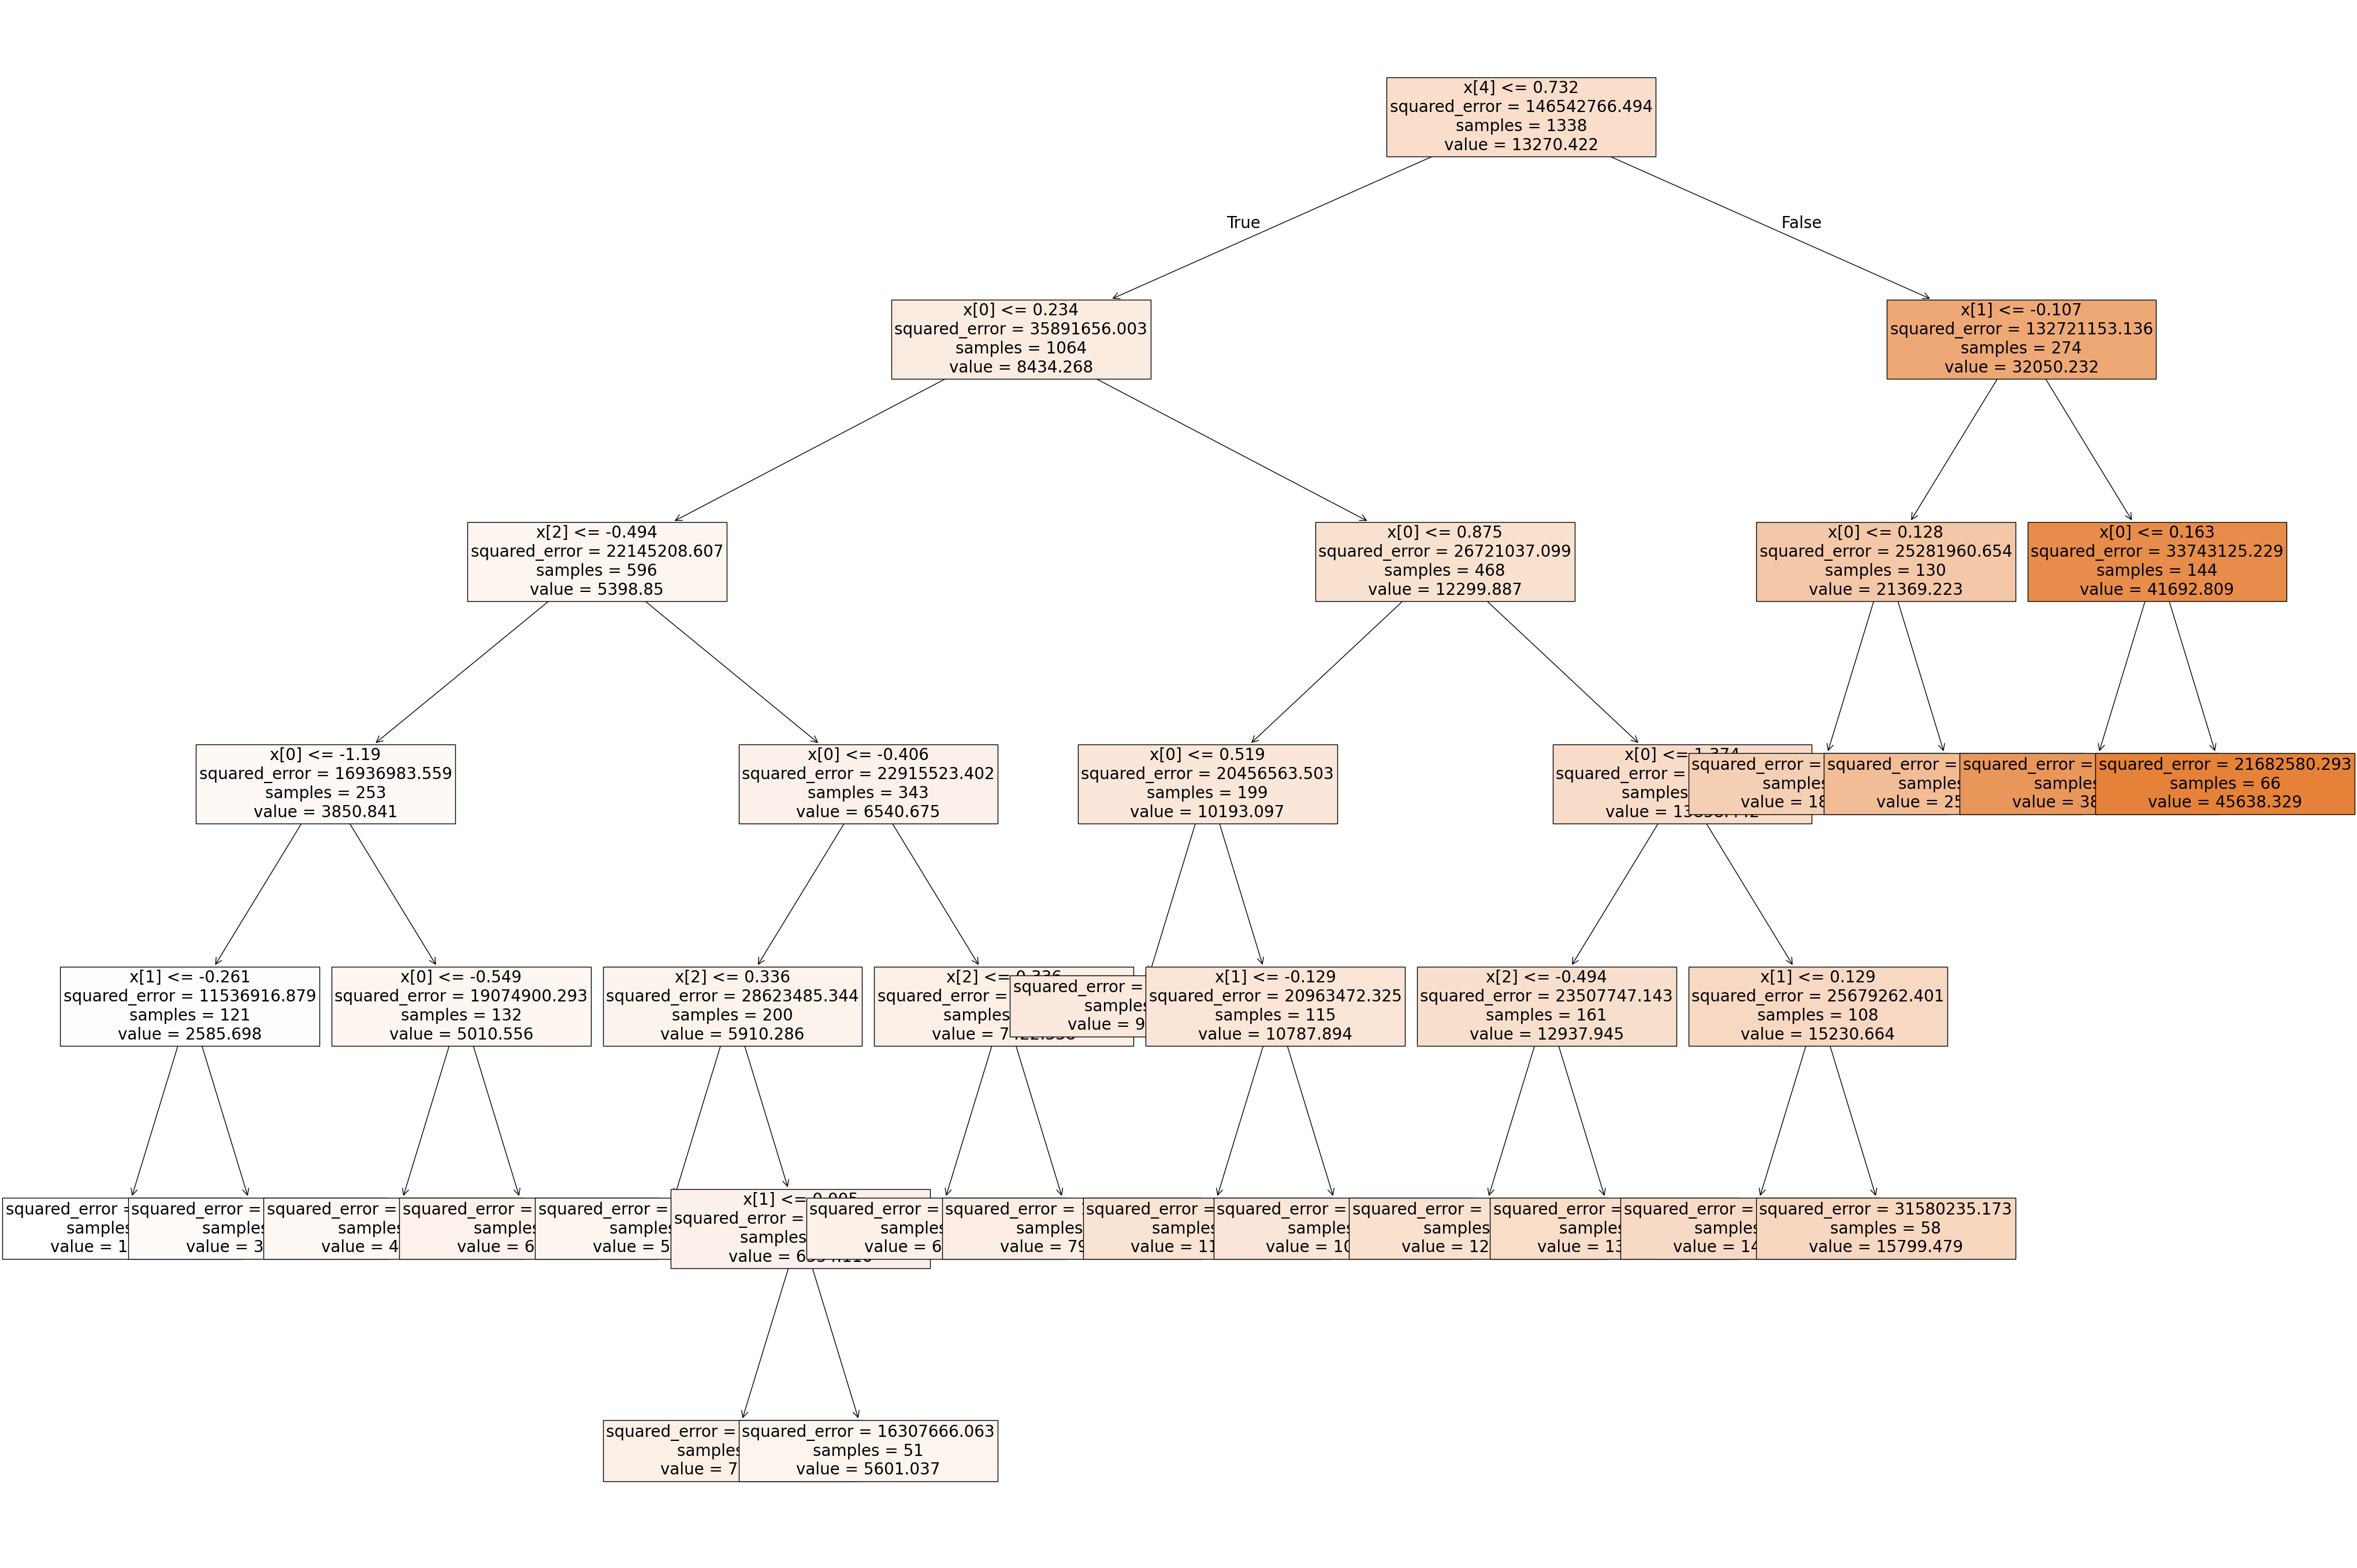

In [23]:
best_tree = gcv.best_estimator_.named_steps['DTC']

plt.figure(figsize = (50, 35))
plot_tree(best_tree,
          # feature_names = list(X.columns),
          filled = True,
          fontsize = 20,
         )

plt.show()

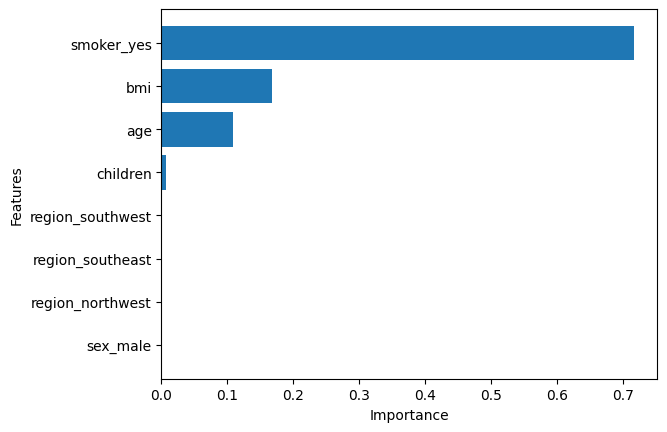

In [28]:
df_imp  = pd.DataFrame({"feature" : gcv.best_estimator_.named_steps['OHE'].get_feature_names_out(),
                        "importance" : best_tree.feature_importances_})       # Note here OHE refers to Column transformer not encoder
df_imp.sort_values("importance", inplace = True, )
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# print(df_imp)

In [25]:
test = pd.read_csv("tst_insure.csv")
y_pred = gcv.predict(test)
y_pred

array([18474.02190658,  5123.38269511,  5601.03687059,  6195.99305654,
        7982.343055  ,  9378.79071988,  1834.923538  ,  1834.923538  ,
       45638.32875106, 10438.37682415,  4240.022163  , 18474.02190658,
       12212.03831542, 18474.02190658,  7982.343055  , 14570.8388602 ,
       14570.8388602 , 13710.38427038,  1834.923538  ,  1834.923538  ,
        1834.923538  ,  3114.41198323,  1834.923538  , 13710.38427038,
        3114.41198323,  7982.343055  ,  5123.38269511, 18474.02190658,
        7377.9631578 , 18474.02190658,  5601.03687059, 45638.32875106,
       10438.37682415, 13710.38427038,  5123.38269511,  6669.54530246,
       11242.2661952 ,  5601.03687059, 25077.11276982,  6669.54530246,
        9378.79071988, 25077.11276982, 18474.02190658, 38354.29227192,
       11242.2661952 , 25077.11276982, 38354.29227192, 13710.38427038,
        7377.9631578 ,  6195.99305654, 11242.2661952 ,  5601.03687059,
        5601.03687059, 11242.2661952 , 15799.47872276,  3114.41198323,
      